In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv('portfolio_data.csv')
df

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285
...,...,...,...,...,...
1515,5/8/2019,1917.770020,283.149994,6171.959961,364.369995
1516,5/9/2019,1899.869995,282.160004,6358.290039,362.750000
1517,5/10/2019,1889.979980,278.369995,7191.359863,361.040009
1518,5/13/2019,1822.680054,273.880005,7980.129883,345.260010


In [121]:
df.isnull().sum()

Date    0
AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64

In [122]:
df['Date'].unique()

array(['5/1/2013', '5/2/2013', '5/3/2013', ..., '5/10/2019', '5/13/2019',
       '5/14/2019'], dtype=object)

In [123]:
df.duplicated().sum()

0

In [124]:
df.shape

(1520, 5)

In [125]:
df.describe()

,AMZN,DPZ,BTC,NFLX
count,1520.000000,1520.000000,1520.000000,1520.000000
mean,821.541810,146.771695,2421.465669,147.668273
std,518.442653,72.192287,3310.894199,107.641486
min,248.229996,51.190983,69.660004,29.464285
25%,364.360001,84.993593,340.904999,62.851071
50%,686.459992,127.168053,625.304993,104.000000
75%,1121.287536,202.454994,3874.912415,192.207496
max,2039.510010,298.635986,18972.320310,418.970001


In [126]:
df['AMZN'].mode()

0      302.859985
1      312.010010
2      361.079987
3      370.559998
4      375.140015
5      488.100006
6      635.349976
7      961.349976
8     1390.000000
9     1591.000000
10    1619.439941
11    1642.810059
12    1665.530029
13    1886.520020
Name: AMZN, dtype: float64

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1520 non-null   object 
 1   AMZN    1520 non-null   float64
 2   DPZ     1520 non-null   float64
 3   BTC     1520 non-null   float64
 4   NFLX    1520 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.5+ KB


In [128]:
df['Date']= pd.to_datetime(df['Date'])
df['Date']

0      2013-05-01
1      2013-05-02
2      2013-05-03
3      2013-05-06
4      2013-05-07
          ...    
1515   2019-05-08
1516   2019-05-09
1517   2019-05-10
1518   2019-05-13
1519   2019-05-14
Name: Date, Length: 1520, dtype: datetime64[ns]

In [129]:
df['AMZN'].median()

686.4599915

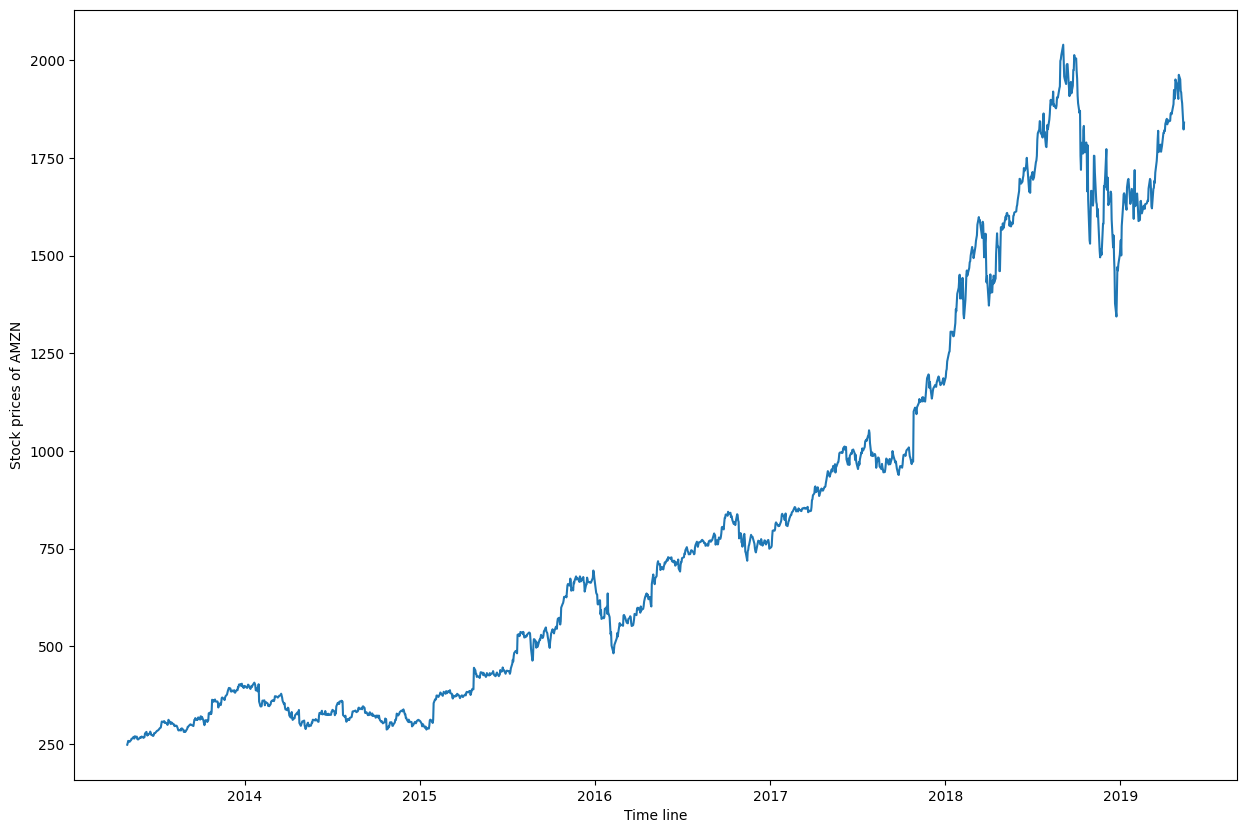

In [130]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df,x='Date',y='AMZN')
plt.ylabel('Stock prices of AMZN')
plt.xlabel('Time line')
plt.show()

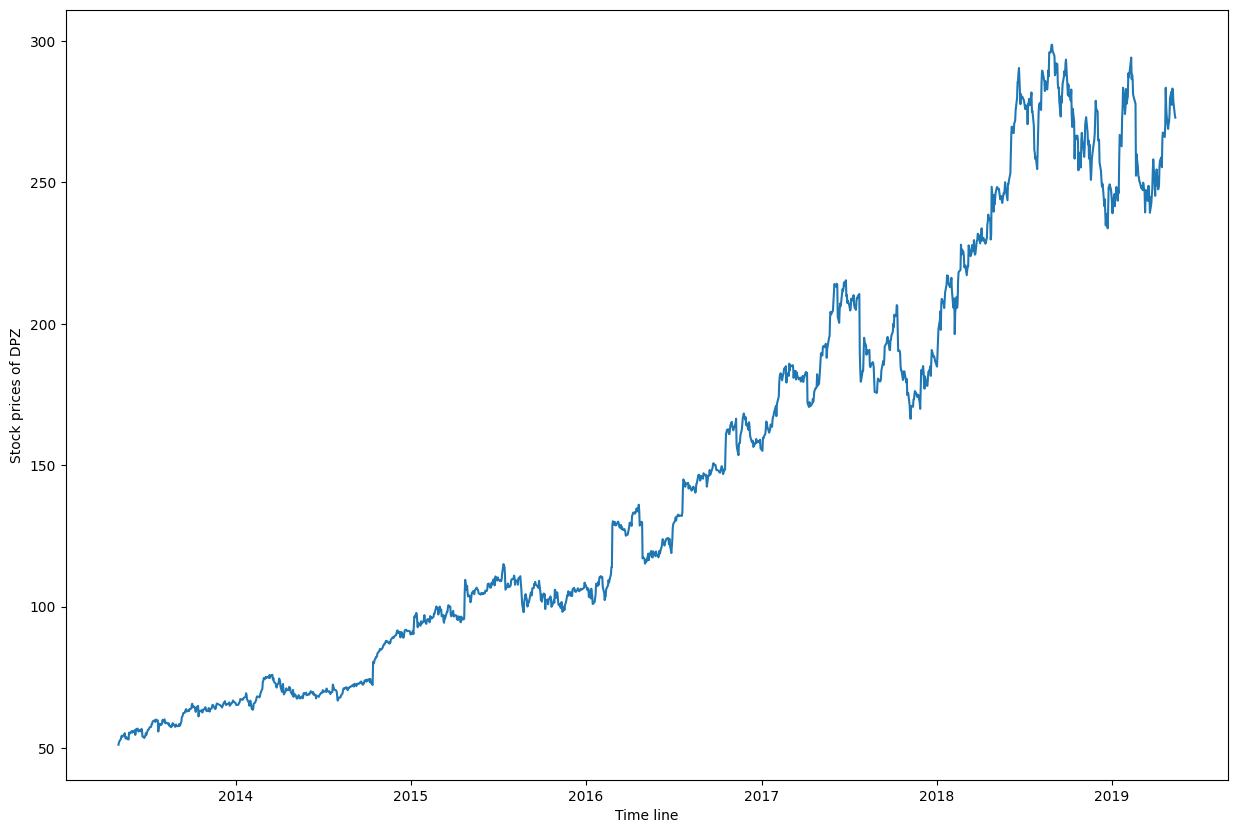

In [131]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df,x='Date',y='DPZ')
plt.ylabel('Stock prices of DPZ')
plt.xlabel('Time line')
plt.show()

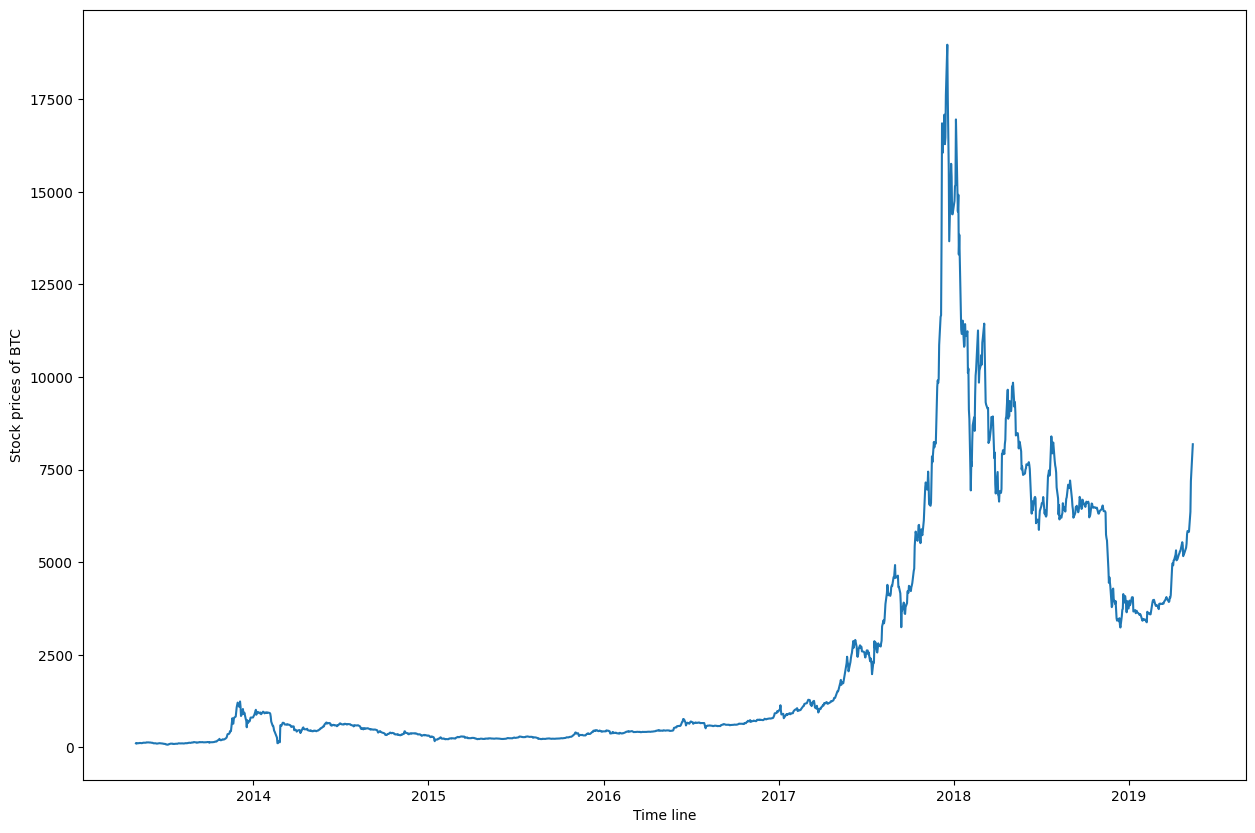

In [132]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df,x='Date',y='BTC')
plt.ylabel('Stock prices of BTC')
plt.xlabel('Time line')
plt.show()

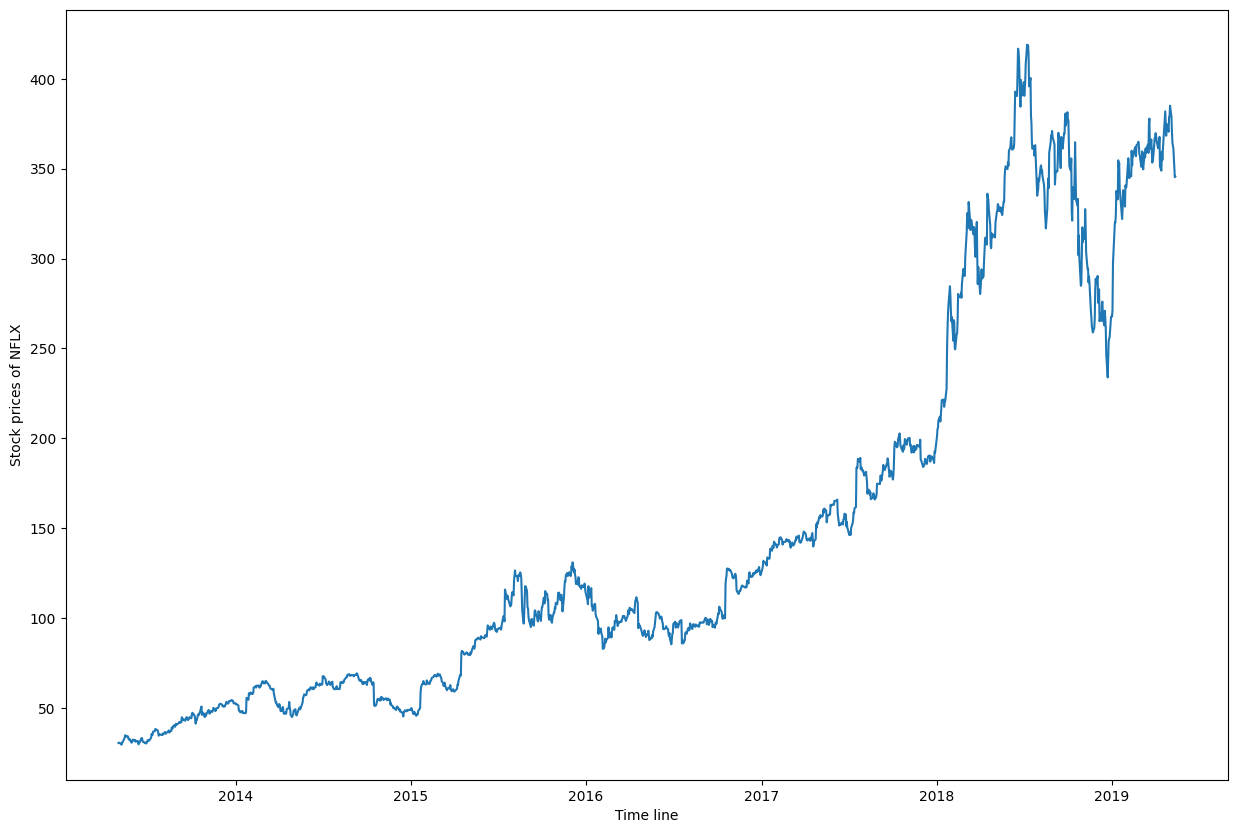

In [133]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df,x='Date',y='NFLX')
plt.ylabel('Stock prices of NFLX')
plt.xlabel('Time line')
plt.show()

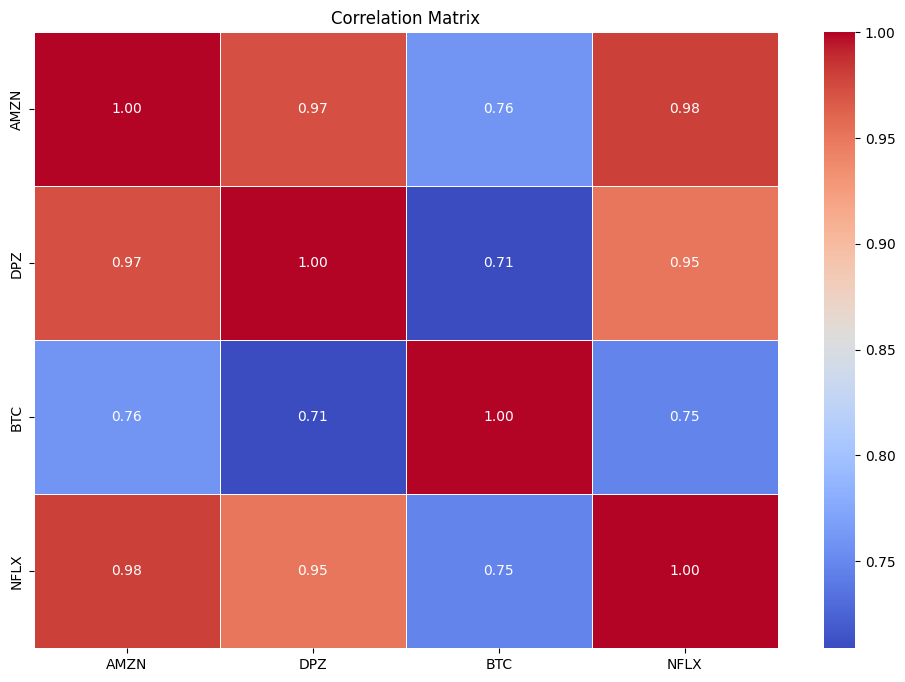

In [134]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [146]:
Y = pd.DataFrame(df['Date'])
Y= pd.to_datetime(df['Date'], format='%d/%m/%Y') 
Y

0      2013-05-01
1      2013-05-02
2      2013-05-03
3      2013-05-06
4      2013-05-07
          ...    
1515   2019-05-08
1516   2019-05-09
1517   2019-05-10
1518   2019-05-13
1519   2019-05-14
Name: Date, Length: 1520, dtype: datetime64[ns]

# Regression for AMZN

In [152]:
X = df.drop(['Date','DPZ','BTC','NFLX'],axis=1)
X

,AMZN
0,248.229996
1,252.550003
2,258.049988
3,255.720001
4,257.730011
...,...
1515,1917.770020
1516,1899.869995
1517,1889.979980
1518,1822.680054


In [153]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
 
model = LinearRegression()
 
model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))

0.8752091522859531


# Regression for BTC

In [154]:
X = df.drop(['Date','DPZ','AMZN','NFLX'],axis=1)
X

,BTC
0,106.250000
1,98.099998
2,112.900002
3,109.599998
4,113.199997
...,...
1515,6171.959961
1516,6358.290039
1517,7191.359863
1518,7980.129883


In [155]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
 
model = LinearRegression()
 
model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))

0.4593202701622656


# Regression for NFLX

In [156]:
X = df.drop(['Date','DPZ','AMZN','BTC'],axis=1)
X

,NFLX
0,30.415714
1,30.641428
2,30.492857
3,30.098572
4,29.464285
...,...
1515,364.369995
1516,362.750000
1517,361.040009
1518,345.260010


In [157]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
 
model = LinearRegression()
 
model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))

0.8284787171464258


# Regression for DPZ

In [158]:
X = df.drop(['Date','NFLX','AMZN','BTC'],axis=1)
X

,DPZ
0,51.190983
1,51.987320
2,52.446388
3,53.205257
4,54.151505
...,...
1515,283.149994
1516,282.160004
1517,278.369995
1518,273.880005


In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
 
model = LinearRegression()
 
model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))

0.9229373462635123


# Regression for Overall


In [165]:
X = df.drop(['Date'],axis=1)
X

,AMZN,DPZ,BTC,NFLX
0,248.229996,51.190983,106.250000,30.415714
1,252.550003,51.987320,98.099998,30.641428
2,258.049988,52.446388,112.900002,30.492857
3,255.720001,53.205257,109.599998,30.098572
4,257.730011,54.151505,113.199997,29.464285
...,...,...,...,...
1515,1917.770020,283.149994,6171.959961,364.369995
1516,1899.869995,282.160004,6358.290039,362.750000
1517,1889.979980,278.369995,7191.359863,361.040009
1518,1822.680054,273.880005,7980.129883,345.260010


In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
 
model = LinearRegression()
 
model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))

0.9350961114429329


# RECENT TREND IN STOCK PRICES

In [185]:
df_recent = df[df['Date'] > pd.Timestamp('2019-01-01')]
df_recent['Date'] = pd.to_numeric(df_recent['Date'])

C:\Users\vedra\AppData\Local\Temp\ipykernel_1472\3235839585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Date'] = pd.to_numeric(df_recent['Date'])


In [186]:
df_recent

,Date,AMZN,DPZ,BTC,NFLX
1428,1546387200000000000,1539.130005,242.655487,3961.010010,267.660004
1429,1546473600000000000,1500.280029,239.055054,3835.860107,271.200012
1430,1546560000000000000,1575.390015,242.954697,3874.060059,297.570007
1431,1546819200000000000,1629.510010,245.777176,4050.399902,315.339996
1432,1546905600000000000,1656.579956,241.568375,4040.750000,320.269989
...,...,...,...,...,...
1515,1557273600000000000,1917.770020,283.149994,6171.959961,364.369995
1516,1557360000000000000,1899.869995,282.160004,6358.290039,362.750000
1517,1557446400000000000,1889.979980,278.369995,7191.359863,361.040009
1518,1557705600000000000,1822.680054,273.880005,7980.129883,345.260010


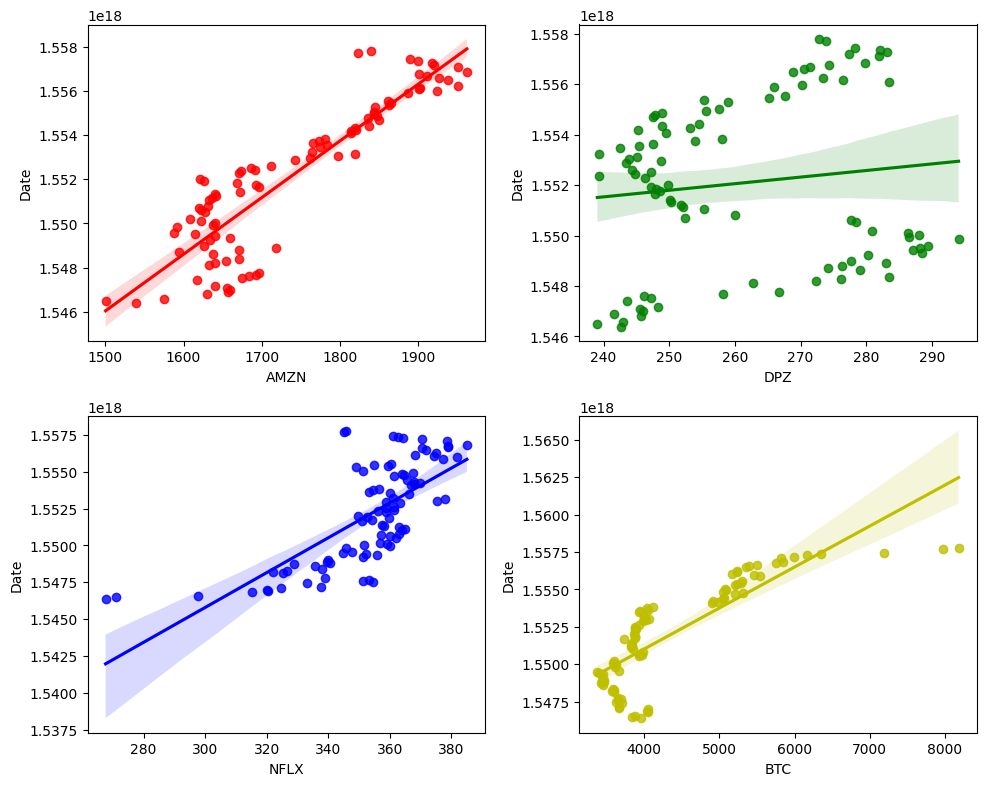

In [188]:
fig,ax = plt.subplots(2, 2, figsize = (10, 8)) 

sns.regplot(data=df_recent,x="AMZN", y="Date", color='r', ax = ax[0][0])
sns.regplot(data=df_recent,x="DPZ", y="Date", color='g', ax = ax[0][1])
sns.regplot(data=df_recent,x="NFLX", y="Date", color='b', ax = ax[1][0])
sns.regplot(data=df_recent,x="BTC", y="Date", color='y', ax = ax[1][1])
fig.tight_layout(pad = 1.2) 

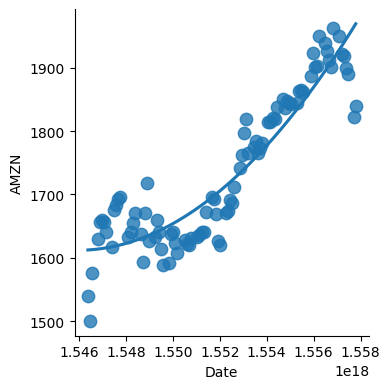

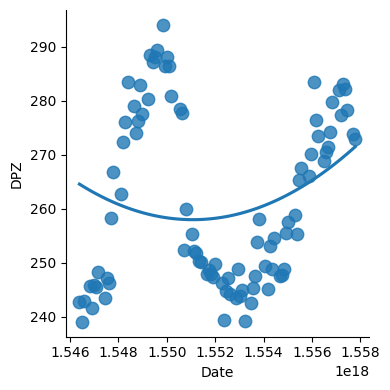

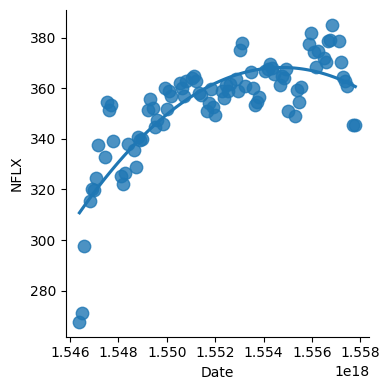

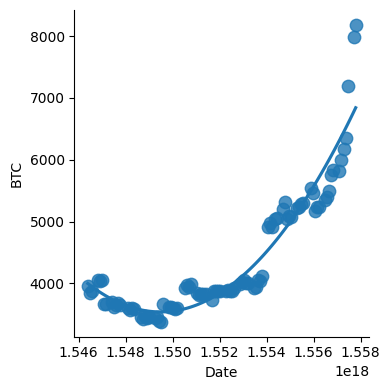

In [190]:
sns.lmplot(x="Date", y="AMZN", data=df_recent, order=2, ci=None, scatter_kws={"s": 80}, height=4)
sns.lmplot(x="Date", y="DPZ", data=df_recent, order=2, ci=None, scatter_kws={"s": 80}, height=4)
sns.lmplot(x="Date", y="NFLX", data=df_recent, order=2, ci=None, scatter_kws={"s": 80}, height=4)
sns.lmplot(x="Date", y="BTC", data=df_recent, order=2, ci=None, scatter_kws={"s": 80}, height=4)

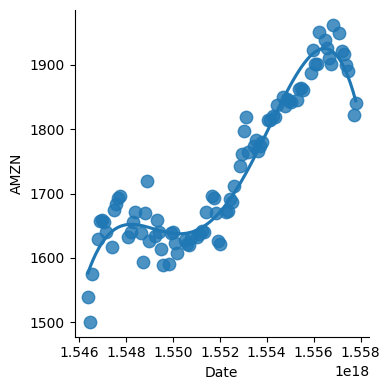

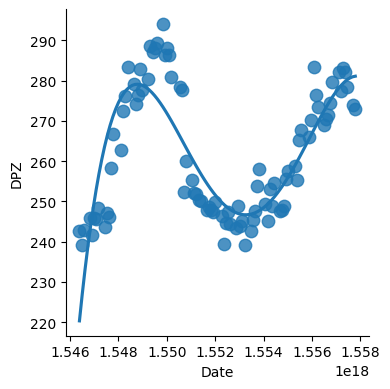

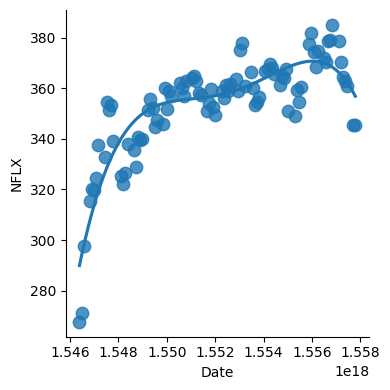

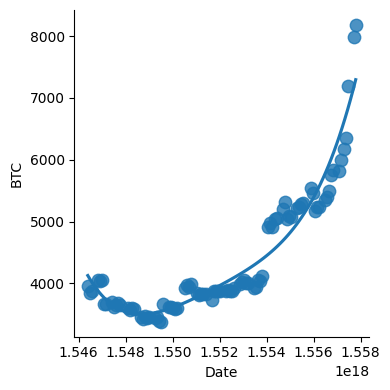

In [191]:
sns.lmplot(x="Date", y="AMZN", data=df_recent, order=4, ci=None, scatter_kws={"s": 80}, height=4)
sns.lmplot(x="Date", y="DPZ", data=df_recent, order=4, ci=None, scatter_kws={"s": 80}, height=4)
sns.lmplot(x="Date", y="NFLX", data=df_recent, order=4, ci=None, scatter_kws={"s": 80}, height=4)
sns.lmplot(x="Date", y="BTC", data=df_recent, order=4, ci=None, scatter_kws={"s": 80}, height=4)